In [20]:
#import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
from glob import glob
import os
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png
import cv2

In [9]:
g = glob('D:\\hackathon\\slice\\slice\\*')
a=[]
for i in g:
    img=cv2.imread(i,cv2.IMREAD_UNCHANGED)
    a.append(img)
a=np.array(a)

In [10]:
for i in range(a.shape[0]):
    for j in range(256):
        for k in range(256):
            for l in range(4):
                if(a[i][j][k][3]==0):
                    a[i][j][k]=np.bitwise_xor(a[i][j][k],a[i][j][k])

In [11]:
b=[]
for i in range(a.shape[0]):
    b.append( cv2.cvtColor(a[i], cv2.COLOR_BGR2GRAY))
b=np.array(b)

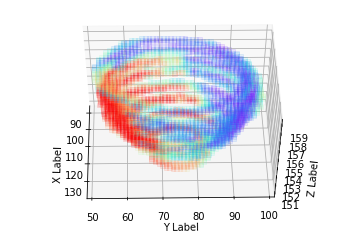

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xr=[]
yr=[]
zr=[]
xg=[]
yg=[]
zg=[]
xb=[]
yb=[]
zb=[]
t=[]
z=150
for i in range(b.shape[0]):
    z+=1
    for j in range(b[i].shape[0]):
        for k in range(b[i][j].shape[0]):
            if(b[i][j][k]!=0):
                t.append(b[i][j][k])
                xr.append(j)
                yr.append(k)
                zr.append(z)

ax.scatter(xr, yr, zr, c=t, cmap='rainbow',marker='s',alpha=0.1)
#ax.scatter(xg, yg, zg, c='g', marker='s',alpha=0.05)
#ax.scatter(xb, yb, zb, c='r', marker='s',alpha=0.05)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
for ii in range(0,360,1):
    ax.view_init(elev=50, azim=ii)
    savefig("./3d-model/3dm%.3d.png" % ii)
plt.show()

C:\Users\Aparoop\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


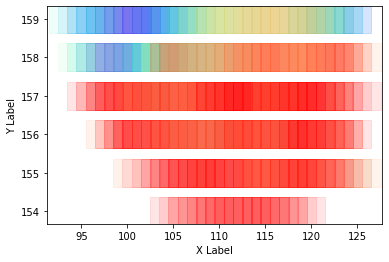

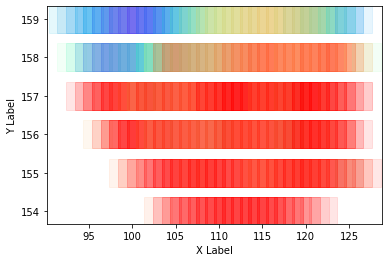

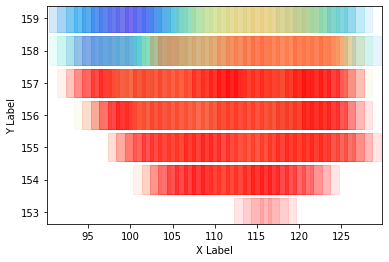

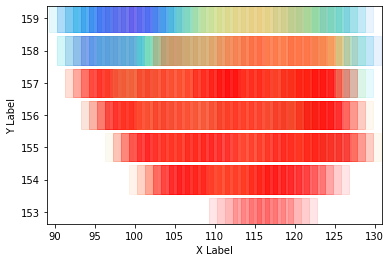

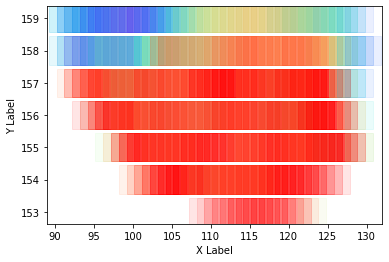

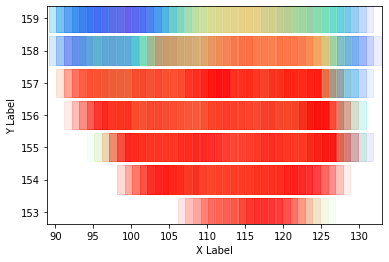

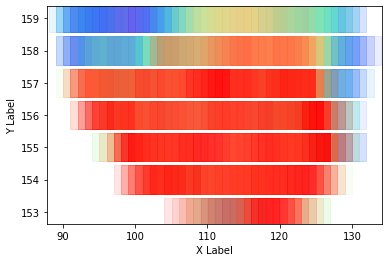

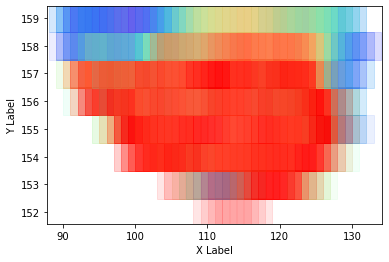

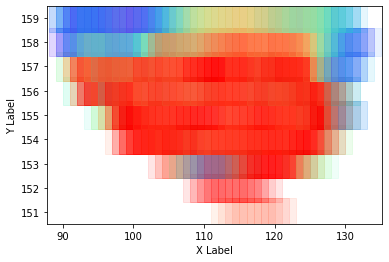

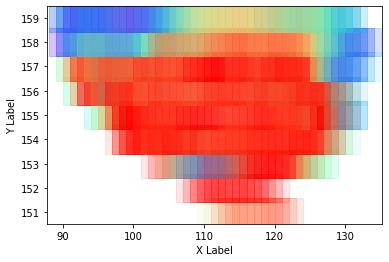

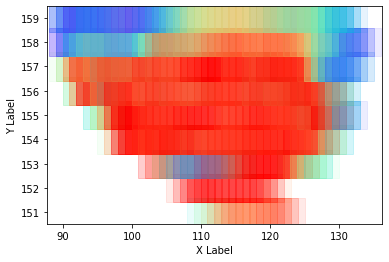

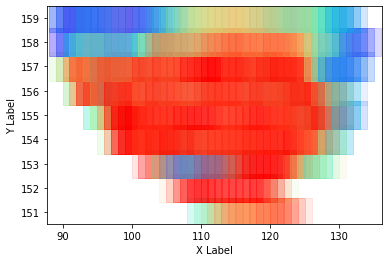

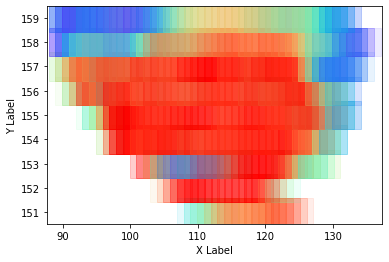

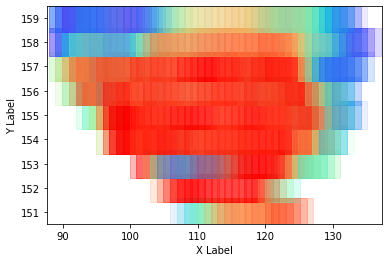

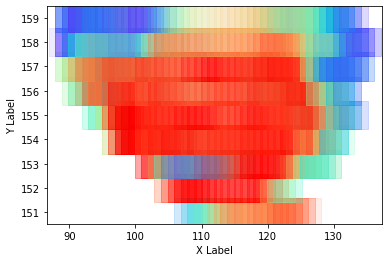

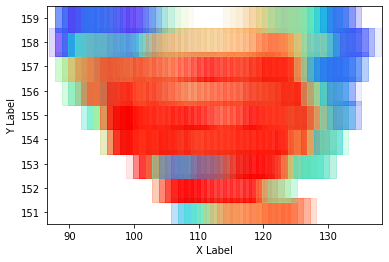

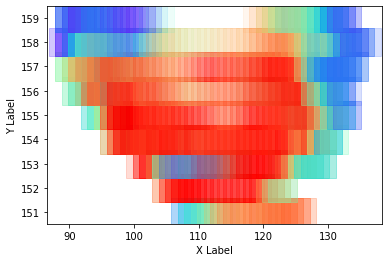

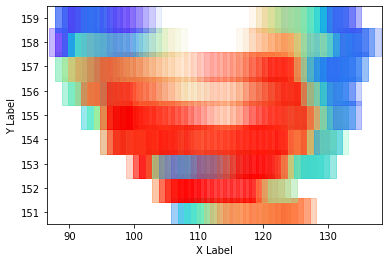

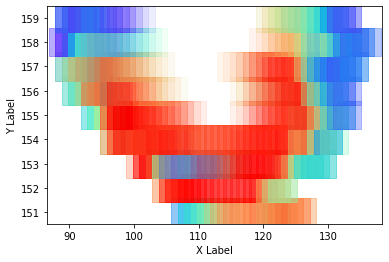

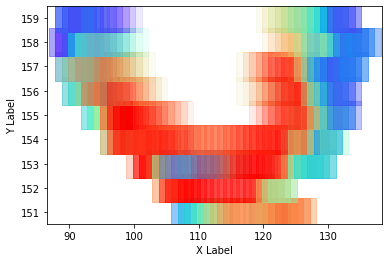

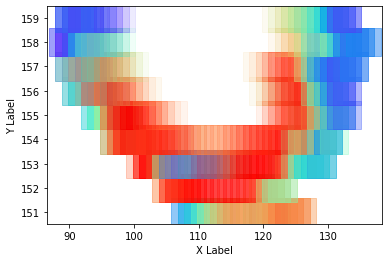

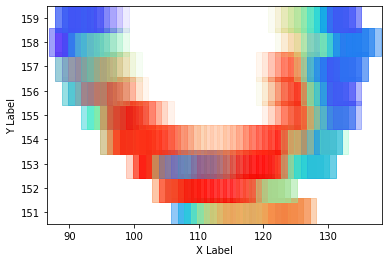

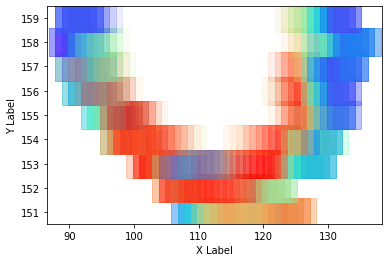

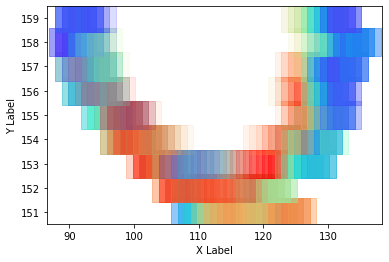

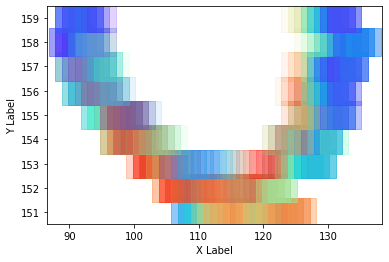

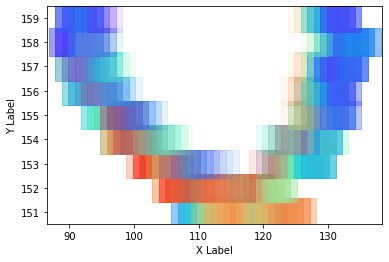

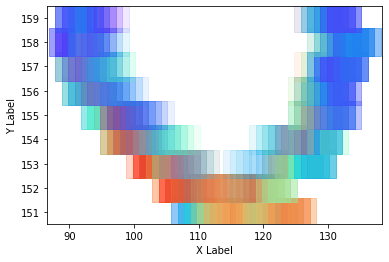

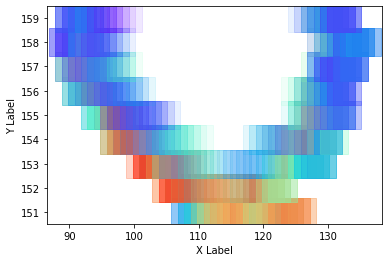

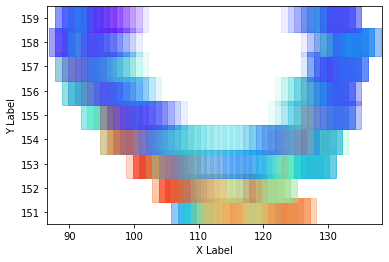

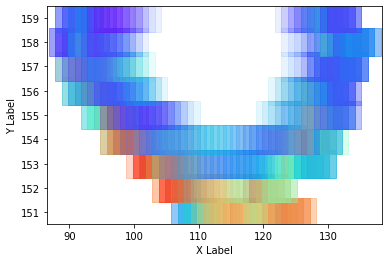

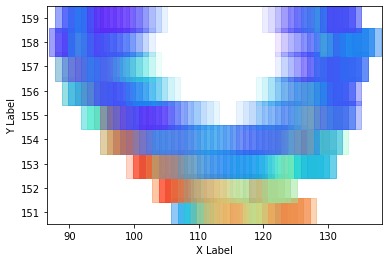

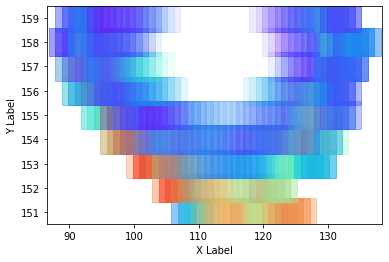

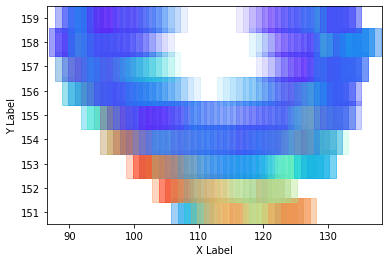

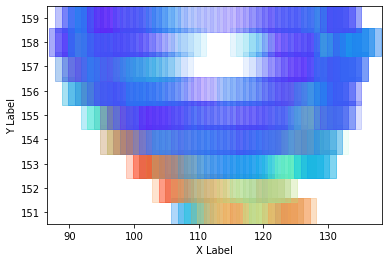

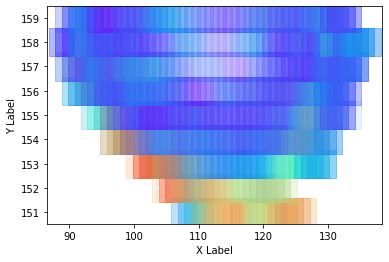

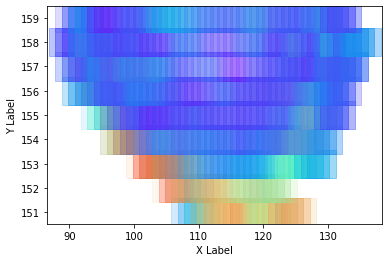

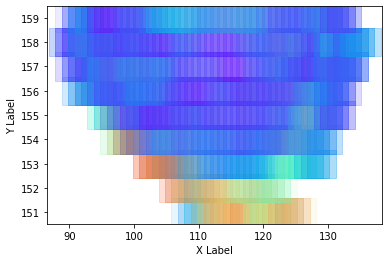

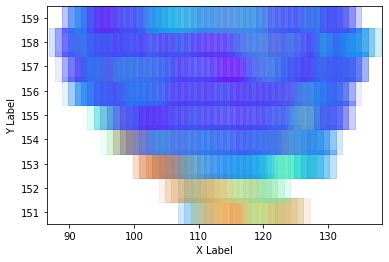

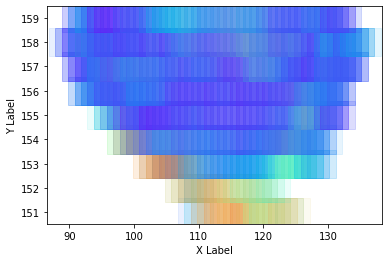

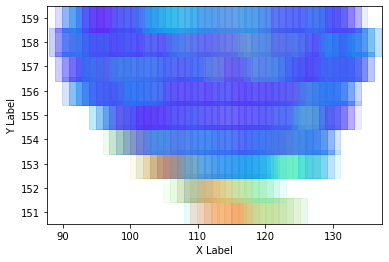

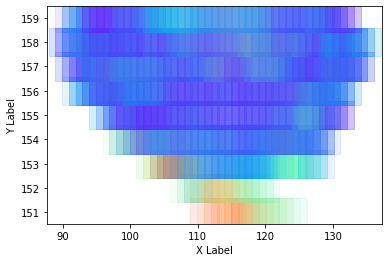

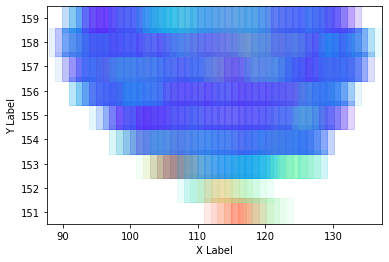

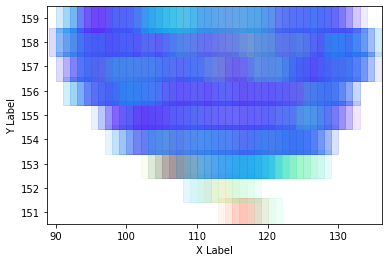

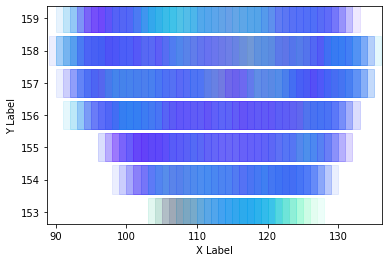

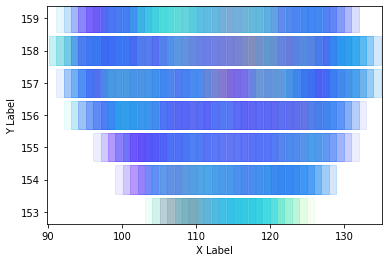

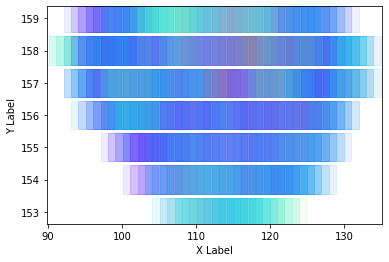

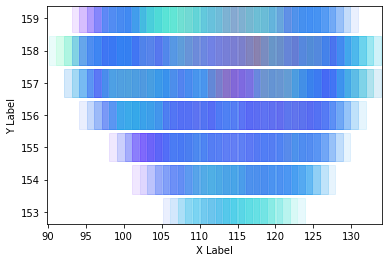

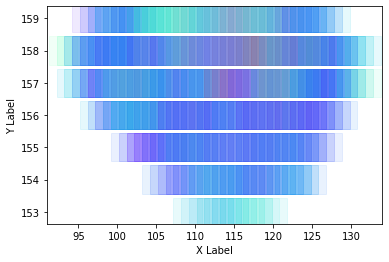

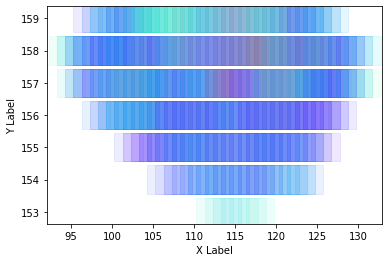

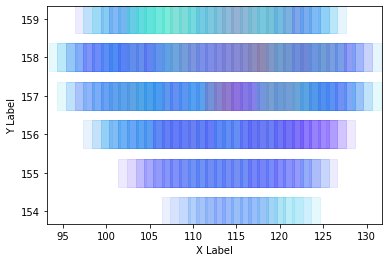

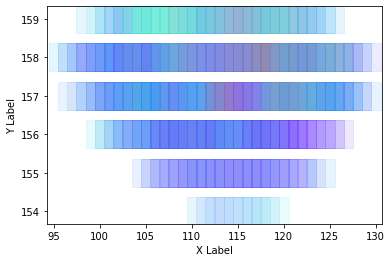

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

th=50
for ii in range(50,101):
    figg = plt.figure()
    bx = figg.add_subplot(111)
    xr=[]
    yr=[]
    zr=[]
    xg=[]
    yg=[]
    zg=[]
    xb=[]
    yb=[]
    zb=[]
    t=[]
    z=150
    for i in range(b.shape[0]):
        z+=1
        for j in range(b[i].shape[0]):
            for k in range(b[i][j].shape[0]):
                if(b[i][j][k]!=0 and k>th-10 and k<th+10):
                    t.append(b[i][j][k])
                    xr.append(j)
                    yr.append(k)
                    zr.append(z)
    s = [800 for n in range(len(xr))]
    bx.scatter(xr, zr, c=t, cmap='rainbow',marker='s',s=s,alpha=0.1)
    #bx.scatter(xg, zg, c='g', marker='s',alpha=0.4)
    #bx.scatter(xb, zb, c='r', marker='s',alpha=0.4)

    bx.set_xlabel('X Label')
    bx.set_ylabel('Y Label')
    #bx.set_zlabel('Z Label')
    savefig("./cross-section/cs%.3d.png" % (ii%50))
    th+=1
plt.show()